<a href="https://colab.research.google.com/github/LunaEyad/Deep-Learning-Foundations/blob/main/Lecture_9_~_Graph_Traversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Representation
* Graph is a data structure $\text {G = (V, E)}$: consist of $Vertices$ and $Edges$ 
* Can be either directed or undirected 


![graphs](https://i.ibb.co/1JrXZXb/graphs.png)


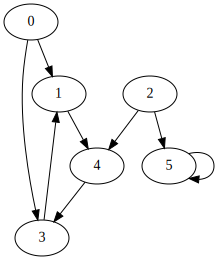

In [2]:
# adjacency list representation
graph_1_vertices = set (list (range (8)))
graph_1_edges = {
  0: [1, 4],
  1: [0, 5],
  2: [5, 6],
  3: [7],
  4: [0],
  5: [1, 2, 6],
  6: [2, 5, 7],
  7: [3, 6]
}
graph_2_vertices = set (list (range (6)))
graph_2_edges = {
0: [1, 3],
1: [4],
2: [4, 5],
3: [1],
4: [3],
5: [5]
}
from graphviz import Digraph 
def draw_graph(vertices, edges):
  dot = Digraph(format="svg")
  for v in vertices:
    dot.node (name = str(v), label = f" {v} ")
  for k, v in edges.items ():
    for curr_v in v:
      dot.edge(str(k), str(curr_v))
  return dot

draw_graph (graph_2_vertices, graph_2_edges)


# Graph Traversal 
It is an algorithm (program) that is given: 
* a graph: $G$ and
* a distinguished source vertex: $s$.

The program ${Systematically}$
 follows the edges of the graph so as to visit the vertices.

Today, we are exploring: 

* $\textbf{Breadth First Traversal}$: This systematically visits every vertex $v$ in the graph reachable from $s$, while identifying the shortest path from $s$ to $v$.

* $\textbf{Depth First Traversal}$: This systematically visits every vertex  $v$ in the graph reachable from  $s$ following the strategy: 
 1. explores edges out of the most recently discovered vertex $v$ 
 2. Once all of the edges of  $v$ have been explored, the search ${{backtracks}}$ to explore other edges leaving the vertex from which $v$ was discovered. 

* $\textbf{Topological Sort}$: Specific only to DAGs (Directed acyclic Graphs), It visists all nodes reachable from s, so as to return a linear sorting of all its vertices such that if C contains an edge from u and v. Then it appears before in this ordering. 




## 1. Breadth First Traversal

In [5]:
from collections import deque 

graph_vertics=graph_1_vertices
graph_edges=graph_1_edges

s =1 
d= deque()
visited = set()
d.append(s)
visited.add(s)
while len(d)>0:
    curr_vertex= d.popleft()

    print(f"visiting : {curr_vertex}")
    for nighapors in graph_edges[curr_vertex]:
      if nighapors not in visited:
        d.append(nighapors)
        visited.add(nighapors)


visiting : 1
visiting : 0
visiting : 5
visiting : 4
visiting : 2
visiting : 6
visiting : 7
visiting : 3


## 2.Depth First Search


In [6]:
graph_vertics=graph_1_vertices
graph_edges=graph_1_edges

s =1 
visited = set()

def dfs(v):
  if v in visited:
    return
  else:
    visited.add(v)
    print(f"visit before nighpors:{v}") 
    for neighpor in graph_edges[v]:
      dfs(neighpor)
dfs(s)

visit before nighpors:1
visit before nighpors:0
visit before nighpors:4
visit before nighpors:5
visit before nighpors:2
visit before nighpors:6
visit before nighpors:7
visit before nighpors:3


In [7]:
graph_vertics=graph_1_vertices
graph_edges=graph_1_edges

s =1 
visited = set()

def dfs(v):
  if v in visited:
    return
  else:
    visited.add(v)
    
    for neighpor in graph_edges[v]:
      dfs(neighpor)
    print(f"visit after nighpors:{v}")   
dfs(s)

visit after nighpors:4
visit after nighpors:0
visit after nighpors:3
visit after nighpors:7
visit after nighpors:6
visit after nighpors:2
visit after nighpors:5
visit after nighpors:1


In [8]:
graph_vertics=graph_2_vertices
graph_edges=graph_2_edges
visited = set()  
def dfs(v):
  if v in visited:
    return
  else:
    visited.add(v)
    print(f"visit before nighpors:{v}") 
    for neighpor in graph_edges[v]:
      dfs(neighpor)

for node in graph_vertics:      
  if node not in visited:    
    print("new DFS search") 
    dfs(node)


new DFS search
visit before nighpors:0
visit before nighpors:1
visit before nighpors:4
visit before nighpors:3
new DFS search
visit before nighpors:2
visit before nighpors:5
